In [ ]:
import numpy as np
import pandas as pd
import statistics as st
import scipy.stats as st1
import matplotlib.pyplot as plt
import math
from statsmodels.stats.stattools import durbin_watson
import statsmodels.api as sm

In [ ]:
vr1 = np.loadtxt("./1.txt")
vr2 = np.loadtxt("./2.txt")

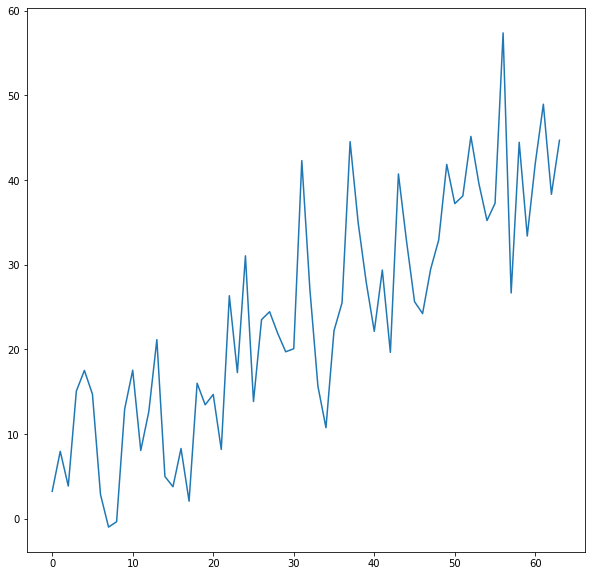

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(vr2)

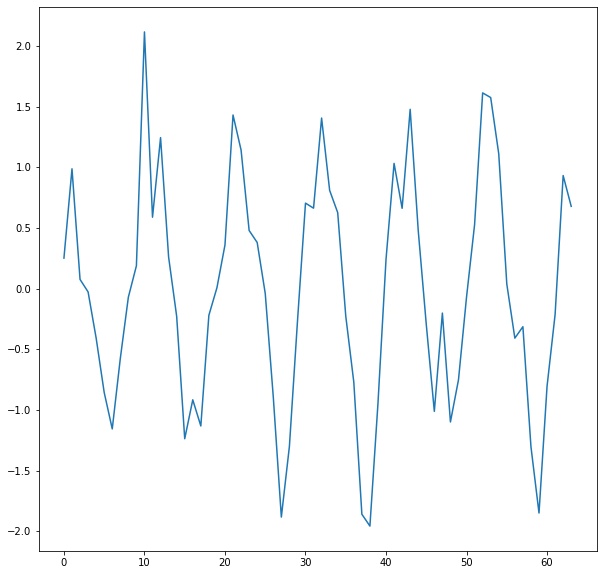

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(vr1)

## Задание 
Провести сглаживание данных с помощью: 
1. метода простого скользящего среднего
2. метода взвешенного скользящего среднего 
3. экспоненциального сглаживания 
4. двойного экспоненциального сглаживания 

После сглаживания провести тест Дарбина-Уотсона для оценки результата. 

# SMA

In [ ]:
def window(m, point, arr):
    w = 2*m+1
    a = point - m
    b = point + m
    weights = np.ones(w)
    for i in range (w):
        weights[i] = 1/(2*m+1)
    ab = np.ones(w)
    for i in range(0, w):
        ab[i] = arr[a+i]
    return sum(ab*weights)
def SVM(m, data):
    w = 2*m+1
    new_vr = np.zeros(len(data)+2*m)
    last, first = data[-1], data[0]
    for i in range(m):
        new_vr[i] = first
    for j in range(1, m+1):
        new_vr[-j] = last
    for k in range(0, len(data)):
        new_vr[k+m] = data[k]
    vr_svm  = np.array(data)
    for i in range(0, len(vr_svm)):
        vr_svm[i] = window(m, i+m, new_vr)
    return vr_svm

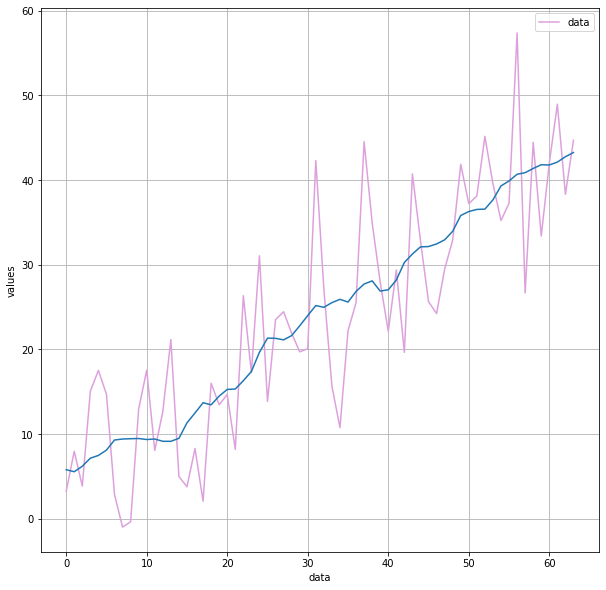

In [ ]:
plt.figure(figsize = (10, 10))
plt.plot(vr2, label = "data", color = 'plum')
plt.xlabel('data')
plt.ylabel('values')
plt.plot(SVM(7, vr2))
plt.legend()
plt.grid()
plt.show()

In [ ]:
print("1", sm.stats.acorr_ljungbox(vr2-SVM(1, vr2), lags=[5], return_df=True))
print("3", sm.stats.acorr_ljungbox(vr2-SVM(3, vr2), lags=[5], return_df=True))
print("5", sm.stats.acorr_ljungbox(vr2-SVM(5, vr2), lags=[5], return_df=True))
print("7", sm.stats.acorr_ljungbox(vr2-SVM(7, vr2), lags=[5], return_df=True))
print("9", sm.stats.acorr_ljungbox(vr2-SVM(9, vr2), lags=[5], return_df=True))
print("durbin_watson =",round(durbin_watson(vr2-SVM(9, vr2)),3))

#p-value должно быть больше 0,05, так как это Н0 говорящая о том, что остатки распределены случайно

1      lb_stat     lb_pvalue
5  42.209057  5.343599e-08
3      lb_stat  lb_pvalue
5  18.801215   0.002093
5      lb_stat  lb_pvalue
5  15.639969   0.007951
7     lb_stat  lb_pvalue
5  8.621079   0.125166
9     lb_stat  lb_pvalue
5  8.936827   0.111611
durbin_watson = 1.951


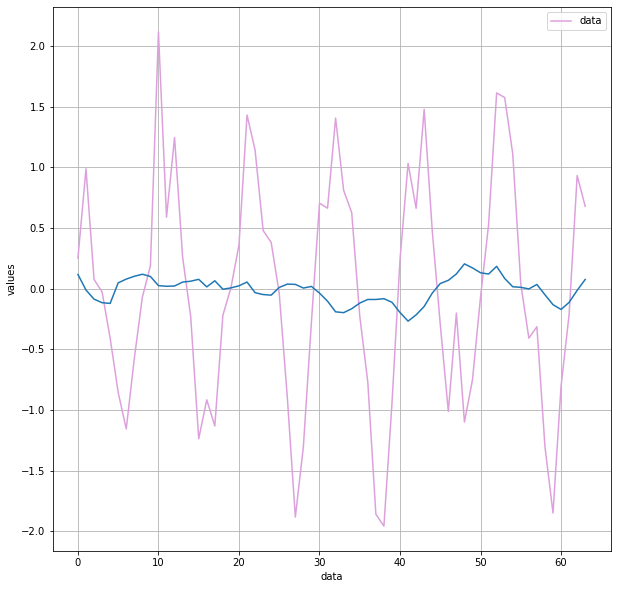

In [ ]:
plt.figure(figsize = (10, 10))
plt.plot(vr1, label = "data", color = 'plum')
plt.xlabel('data')
plt.ylabel('values')
plt.plot(SVM(5, vr1))
plt.grid()
plt.legend()

In [ ]:
print("1", sm.stats.acorr_ljungbox(vr1-SVM(1, vr2), lags=[5], return_df=True))
print("3", sm.stats.acorr_ljungbox(vr1-SVM(3, vr2), lags=[5], return_df=True))
print("5", sm.stats.acorr_ljungbox(vr1-SVM(5, vr2), lags=[5], return_df=True))
print("7", sm.stats.acorr_ljungbox(vr1-SVM(7, vr2), lags=[5], return_df=True))
print("9", sm.stats.acorr_ljungbox(vr1-SVM(9, vr2), lags=[5], return_df=True))

1       lb_stat     lb_pvalue
5  207.326374  7.686336e-43
3       lb_stat     lb_pvalue
5  258.905974  6.742741e-54
5       lb_stat     lb_pvalue
5  260.337538  3.323080e-54
7       lb_stat     lb_pvalue
5  258.358195  8.839263e-54
9       lb_stat     lb_pvalue
5  261.066988  2.317137e-54


In [ ]:
for i in range (3, 10):
    if i % 2!=0:
        e = vr1 - SVM(i, vr1)
        print(i, e.mean())
round(durbin_watson(vr1-SVM(5, vr1)),3)

3 0.0020383331097118783
5 -0.008459651508155142
7 -0.025620963157863032
9 -0.04147303494557353


0.641

# WVM

In [ ]:
def window2(m,eps, point, arr):
    w = 2*m+1
    a = point - m
    b = point + m
    weights = np.ones(w)
    secw = np.zeros(w)
    for j in range(w):
        secw[j] = np.exp(-eps*abs(j - m))
    for i in range(w):
        weights[i] = (np.exp(-eps*abs(i - m)))/(sum(secw))
    ab = np.ones(w)
    for i in range(0, w):
        ab[i] = arr[a+i]
    return sum(ab*weights)
def WVM(m, eps, data):
    w = 2*m+1
    new_vr = np.zeros(len(data)+2*m)
    last, first = data[-1], data[0]
    for i in range(m):
        new_vr[i] = first
    for j in range(1, m+1):
        new_vr[-j] = last
    for k in range(0, len(data)):
        new_vr[k+m] = data[k]
    vr_svm  = np.array(data)
    for i in range(0, len(vr_svm)):
        vr_svm[i] = window2(m, eps, i+m, new_vr)
    return vr_svm

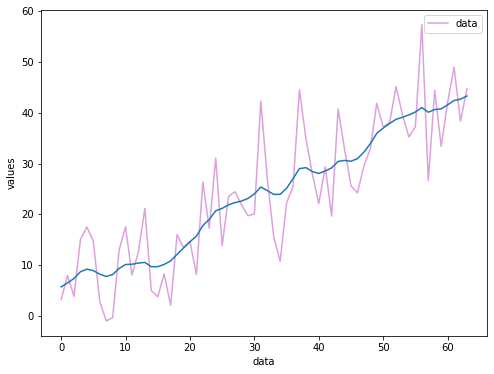

In [ ]:
plt.figure(figsize = (8, 6))
plt.plot(vr2, label = "data", color = 'plum')
plt.xlabel('data')
plt.ylabel('values')
plt.plot(WVM(7, 0.3, vr2))
plt.legend()

In [ ]:
print("1", sm.stats.acorr_ljungbox(vr2-WVM(1,0.3, vr2), lags=[5], return_df=True))
print("3", sm.stats.acorr_ljungbox(vr2-WVM(3,0.3, vr2), lags=[5], return_df=True))
print("5", sm.stats.acorr_ljungbox(vr2-WVM(5,0.3, vr2), lags=[5], return_df=True))
print("7", sm.stats.acorr_ljungbox(vr2-WVM(7,0.3, vr2), lags=[5], return_df=True))
print("9", sm.stats.acorr_ljungbox(vr2-WVM(9,0.3, vr2), lags=[5], return_df=True))
print("durbin_watson =",durbin_watson(vr2-WVM(9, 0.3, vr2)))

1      lb_stat     lb_pvalue
5  42.209057  5.343599e-08
3      lb_stat  lb_pvalue
5  14.118983   0.014871
5      lb_stat  lb_pvalue
5  11.645446   0.039983
7     lb_stat  lb_pvalue
5  9.869634   0.079015
9     lb_stat  lb_pvalue
5  9.917453   0.077608
durbin_watson = 2.178343897046416


In [ ]:
WVM(9,0.3, vr1)

array([ 0.17664167,  0.17001504,  0.07401907, -0.01331767, -0.10561614,
       -0.17204285, -0.1823661 , -0.09729298,  0.03024143,  0.17453804,
        0.3190036 ,  0.28739354,  0.24742081,  0.11194797, -0.03941322,
       -0.16977164, -0.19990623, -0.17694382, -0.07965298,  0.03028745,
        0.13494901,  0.24465384,  0.23675351,  0.16127808,  0.05636477,
       -0.07247239, -0.21738567, -0.3033032 , -0.25951326, -0.12259395,
        0.032023  ,  0.12426169,  0.17917806,  0.12226264,  0.01107319,
       -0.16161769, -0.3275235 , -0.45203449, -0.44257973, -0.30669254,
       -0.11537237,  0.04969182,  0.12203092,  0.1632337 ,  0.08468472,
       -0.024545  , -0.11230539, -0.11111792, -0.10512922, -0.02764932,
        0.09824484,  0.24014655,  0.36284306,  0.37013646,  0.27117669,
        0.09913456, -0.06092096, -0.19455904, -0.30729374, -0.32645329,
       -0.20281696, -0.02321494,  0.16952442,  0.29451485])

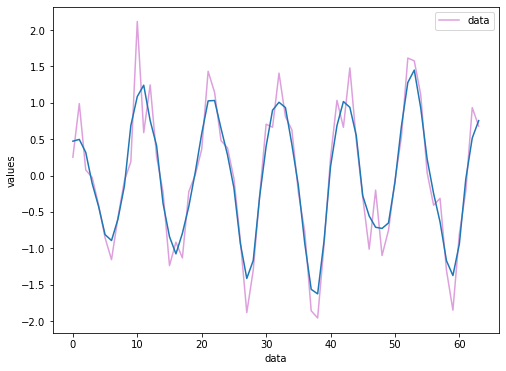

In [ ]:
plt.figure(figsize = (8, 6))
plt.plot(vr1, label = "data", color = 'plum')
plt.xlabel('data')
plt.ylabel('values')
plt.plot(WVM(1, 0.3, vr1))
plt.legend()

In [ ]:
print("1", sm.stats.acorr_ljungbox(vr1-WVM(1,0.3, vr1), lags=[5], return_df=True))
print("3", sm.stats.acorr_ljungbox(vr1-WVM(3,0.3, vr1), lags=[5], return_df=True))
print("5", sm.stats.acorr_ljungbox(vr1-WVM(5,0.3, vr1), lags=[5], return_df=True))
print("7", sm.stats.acorr_ljungbox(vr1-WVM(7,0.3, vr1), lags=[5], return_df=True))
print("9", sm.stats.acorr_ljungbox(vr1-WVM(9,0.3, vr1), lags=[5], return_df=True))

print("durbin_watson =",durbin_watson(vr1-WVM(3,0.3, vr1)))

1      lb_stat  lb_pvalue
5  32.965987   0.000004
3      lb_stat     lb_pvalue
5  37.594384  4.551570e-07
5      lb_stat     lb_pvalue
5  85.145213  7.018125e-17
7      lb_stat     lb_pvalue
5  94.571013  7.350617e-19
9      lb_stat     lb_pvalue
5  93.271843  1.379156e-18
durbin_watson = 1.3281380339322668


# EMA

In [ ]:
def St(alpha, t, vr):
    if t == 0: return vr[0]
    else:
        return alpha*vr[t]+(1-alpha)*St(alpha, t-1,vr)
def EMA(vr, alpha):
    new_vr = np.zeros(len(vr))
    for i in range (len(vr)):
        new_vr[i] = St(alpha,i, vr)
    return new_vr

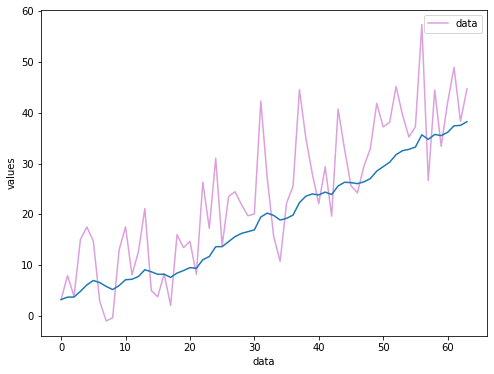

In [ ]:
plt.figure(figsize = (8, 6))
plt.plot(vr2, label = "data", color = 'plum')
plt.xlabel('data')
plt.ylabel('values')
plt.plot(EMA(vr2, 0.1))
plt.legend()

In [ ]:
print("0.1", sm.stats.acorr_ljungbox(vr2-EMA(vr2,0.1), lags=[5], return_df=True))
print("0.3", sm.stats.acorr_ljungbox(vr2-EMA(vr2,0.3), lags=[5], return_df=True))
print("0.5", sm.stats.acorr_ljungbox(vr2-EMA(vr2,0.5), lags=[5], return_df=True))
print("0.7", sm.stats.acorr_ljungbox(vr2-EMA(vr2,0.7), lags=[5], return_df=True))
print("0.9", sm.stats.acorr_ljungbox(vr2-EMA(vr2,0.9), lags=[5], return_df=True))

0.1     lb_stat  lb_pvalue
5  6.217351   0.285641
0.3     lb_stat  lb_pvalue
5  8.992507   0.109363
0.5     lb_stat  lb_pvalue
5  9.136455   0.103744
0.7      lb_stat  lb_pvalue
5  10.062851   0.073474
0.9      lb_stat  lb_pvalue
5  14.305506   0.013781


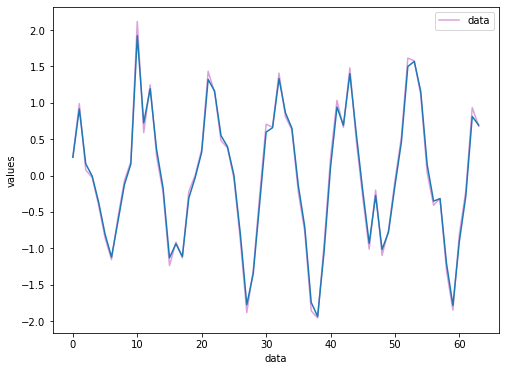

In [ ]:
plt.figure(figsize = (8, 6))
plt.plot(vr1, label = "data", color = 'plum')
plt.xlabel('data')
plt.ylabel('values')
plt.plot(EMA(vr1, 0.9))
plt.legend()

In [ ]:
print("0.1", sm.stats.acorr_ljungbox(vr1-EMA(vr1,0.1), lags=[5], return_df=True))
print("0.3", sm.stats.acorr_ljungbox(vr1-EMA(vr1,0.3), lags=[5], return_df=True))
print("0.5", sm.stats.acorr_ljungbox(vr1-EMA(vr1,0.5), lags=[5], return_df=True))
print("0.7", sm.stats.acorr_ljungbox(vr1-EMA(vr1,0.7), lags=[5], return_df=True))
print("0.9", sm.stats.acorr_ljungbox(vr1-EMA(vr1,0.9), lags=[5], return_df=True))
best_alpha = 0
for i in range (1, 10):
    if sm.stats.acorr_ljungbox(vr1-EMA(vr1,i/10), lags=[5], return_df=False) < sm.stats.acorr_ljungbox(vr1-EMA(vr1,best_alpha), lags=[5], return_df=False):
        best_alpha = i/10
print(best_alpha)

0.1       lb_stat     lb_pvalue
5  103.683545  8.836741e-21
0.3      lb_stat     lb_pvalue
5  96.903658  2.373239e-19
0.5      lb_stat     lb_pvalue
5  78.722023  1.552873e-15
0.7     lb_stat     lb_pvalue
5  54.12175  1.978478e-10
0.9      lb_stat  lb_pvalue
5  32.011621   0.000006
0.9



# DEMA

In [ ]:
def bt(alpha, gamma, m, X):
    if m == 0: return X[1] - X[0]
    else:
        return gamma*(St(alpha, gamma, m, X) - St(alpha, gamma, m-1, X)) + (1-gamma)*bt(alpha, gamma, m-1, X)
def St(alpha, gamma, t, X):
    if t == 0: return X[0]
    else:
        return alpha*X[t] + (1-alpha) * (St(alpha, gamma, t-1,X)+bt(alpha, gamma, t-1, X))


In [ ]:
def DEMA(arr, alpha, beta):
    new_vr = arr.copy()
    for n in range(1, len(new_vr)):
        if n == 1:
            lx, bx = arr[0], arr[1] - arr[0]
        lx_1, lx = lx, alpha*arr[n] + (1-alpha)*(lx+bx)
        bx = beta*(lx-lx_1) + (1-beta)*bx
        new_vr[n] = lx+bx
    return new_vr

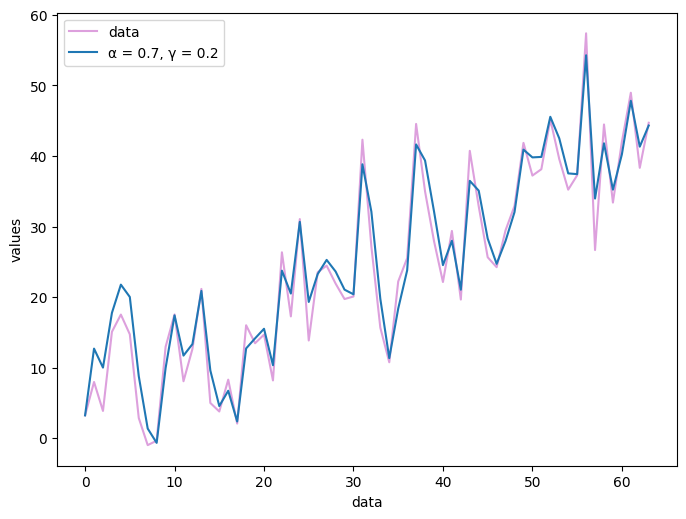

In [ ]:
plt.figure(figsize = (8, 6), dpi = 100)
plt.plot(vr2, label = "data", color = 'plum')
plt.xlabel('data')
plt.ylabel('values')
plt.plot(DEMA(vr2, 0.7, 0.2), label = "α = 0.7, γ = 0.2")
plt.legend()

In [ ]:
best_alpha, best_gamma = 0.1, 0.1 
for i in range (1, 10):
    for j in range (1, 10):
        if sm.stats.acorr_ljungbox(vr2-DEMA(vr2,i/10, j/10), lags=[5], return_df=False) < sm.stats.acorr_ljungbox(vr2-DEMA(vr2,best_alpha, best_gamma), lags=[5], return_df=False):
            best_alpha = i/10
            best_gamma = j/10

In [ ]:
print(best_alpha)
print(best_gamma)

0.7
0.2


In [ ]:
best_alpha, best_gamma = 0.1, 0.1 
for i in range (1, 10):
    for j in range (1, 10):
        if sm.stats.acorr_ljungbox(vr1-DEMA(vr1,i/10, j/10), lags=[5], return_df=False) < sm.stats.acorr_ljungbox(vr1-DEMA(vr1,best_alpha, best_gamma), lags=[5], return_df=False):
            best_alpha = i/10
            best_gamma = j/10

In [ ]:
print(best_alpha)
print(best_gamma)

0.6
0.1


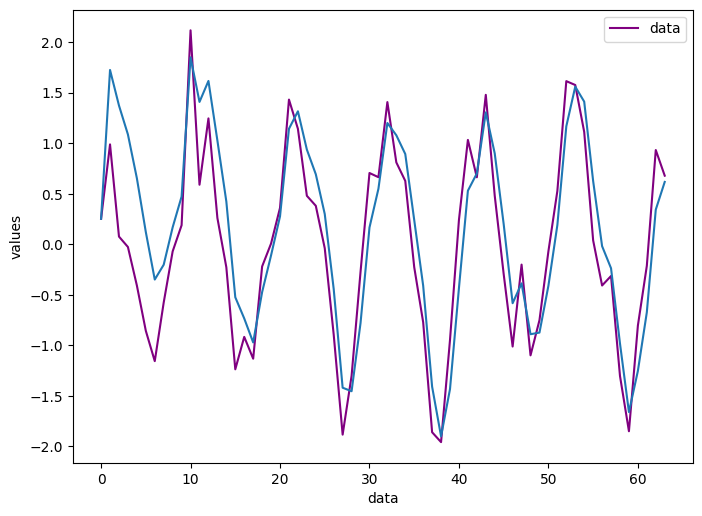

In [ ]:
plt.figure(figsize = (8, 6), dpi = 100)
plt.plot(vr1, label = "data", color = 'purple')
plt.xlabel('data')
plt.ylabel('values')
plt.plot(DEMA(vr1, 0.6, 0.1))
plt.legend()

# Дарбин-Уотсон

дарбина-уотса для svm

In [ ]:
durbin_watson(vr1-SVM(5, vr1))

0.6413200366576857

In [ ]:
durbin_watson(vr2-SVM(9, vr2))

1.9506178637450513

In [ ]:
dl = 1.57
du = 1.63
if 0<=durbin_watson(vr1-SVM(5, vr1)) <= dl:
    print("Есть положительная автокорреляция")
if dl <= durbin_watson(vr1-SVM(5, vr1))<= du:
    print("Неопределенность")
if du <= durbin_watson(vr1-SVM(5, vr1))<=4-du:
    print("Автокорреляция отсутствует")
if 4-du<=durbin_watson(vr1-SVM(5, vr1))<=4-dl:
    print("Неопределенность")
if 4-dl<=durbin_watson(vr1-SVM(5, vr1))<=4:
    print("Есть отрицательная автокорреляция")
    
if 0<=durbin_watson(vr2-SVM(9, vr2)) <= dl:
    print("Есть положительная автокорреляция")
if dl <= durbin_watson(vr2-SVM(9, vr2))<= du:
    print("Неопределенность")
if du <= durbin_watson(vr2-SVM(9, vr2))<=4-du:
    print("Автокорреляция отсутствует")
if 4-du<=durbin_watson(vr2-SVM(9, vr2))<=4-dl:
    print("Неопределенность")
if 4-dl<=durbin_watson(vr2-SVM(9, vr2))<=4:
    print("Есть отрицательная автокорреляция")

Есть положительная автокорреляция
Автокорреляция отсутствует


дарбина уотса для wvm

In [ ]:
durbin_watson(vr1-WVM(1,0.3, vr1)), durbin_watson(vr2-WVM(7,0.3, vr2))

(3.090953014584999, 2.1946708012006586)

In [ ]:
if 0<=durbin_watson(vr1-WVM(1,0.3, vr1)) <= dl:
    print("Есть положительная автокорреляция")
if dl <= durbin_watson(vr1-WVM(1,0.3, vr1))<= du:
    print("Неопределенность")
if du <= durbin_watson(vr1-WVM(1,0.3, vr1))<=4-du:
    print("Автокорреляция отсутствует")
if 4-du<=durbin_watson(vr1-WVM(1,0.3, vr1))<=4-dl:
    print("Неопределенность")
if 4-dl<=durbin_watson(vr1-WVM(1, 0.3,vr1))<=4:
    print("Есть отрицательная автокорреляция")
    
if 0<=durbin_watson(vr2-WVM(7,0.3, vr2)) <= dl:
    print("Есть положительная автокорреляция")
if dl <= durbin_watson(vr2-WVM(7,0.3, vr2))<= du:
    print("Неопределенность")
if du <= durbin_watson(vr2-WVM(7,0.3, vr2))<=4-du:
    print("Автокорреляция отсутствует")
if 4-du<=durbin_watson(vr2-WVM(7,0.3, vr2))<=4-dl:
    print("Неопределенность")
if 4-dl<=durbin_watson(vr2-WVM(7,0.3, vr2))<=4:
    print("Есть отрицательная автокорреляция")

Есть отрицательная автокорреляция
Автокорреляция отсутствует


дарбина уотса для ema

In [ ]:
if 0<=durbin_watson(vr1-EMA(vr1, 0.9)) <= dl:
    print("Есть положительная автокорреляция")
if dl <= durbin_watson(vr1-EMA(vr1, 0.9))<= du:
    print("Неопределенность")
if du <= durbin_watson(vr1-EMA(vr1, 0.9))<=4-du:
    print("Автокорреляция отсутствует")
if 4-du<=durbin_watson(vr1-EMA(vr1, 0.9))<=4-dl:
    print("Неопределенность")
if 4-dl<=durbin_watson(vr1-EMA(vr1, 0.9))<=4:
    print("Есть отрицательная автокорреляция")
    
if 0<=durbin_watson(vr2-EMA(vr2, 0.1)) <= dl:
    print("Есть положительная автокорреляция")
if dl <= durbin_watson(vr2-EMA(vr2, 0.1))<= du:
    print("Неопределенность")
if du <= durbin_watson(vr2-EMA(vr2, 0.1))<=4-du:
    print("Автокорреляция отсутствует")
if 4-du<=durbin_watson(vr2-EMA(vr2, 0.1))<=4-dl:
    print("Неопределенность")
if 4-dl<=durbin_watson(vr2-EMA(vr2, 0.1))<=4:
    print("Есть отрицательная автокорреляция")

Неопределенность
Есть положительная автокорреляция


In [ ]:
print(durbin_watson(vr1-EMA(vr1, 0.9)))
print(durbin_watson(vr2-EMA(vr2, 0.1)))

1.581211530663958
1.2877052548974564


дарбина уотса для dema

In [ ]:
if 0<=durbin_watson(vr1-DEMA(vr1, 0.6, 0.1)) <= dl:
    print("Есть положительная автокорреляция")
if dl <= durbin_watson(vr1-DEMA(vr1, 0.6, 0.1))<= du:
    print("Неопределенность")
if du <= durbin_watson(vr1-DEMA(vr1, 0.6, 0.1))<=4-du:
    print("Автокорреляция отсутствует")
if 4-du<=durbin_watson(vr1-DEMA(vr1, 0.6, 0.1))<=4-dl:
    print("Неопределенность")
if 4-dl<=durbin_watson(vr1-DEMA(vr1, 0.6, 0.1))<=4:
    print("Есть отрицательная автокорреляция")
    
if 0<=durbin_watson(vr2-DEMA(vr2, 0.7, 0.2)) <= dl:
    print("Есть положительная автокорреляция")
if dl <= durbin_watson(vr2-DEMA(vr2, 0.7, 0.2))<= du:
    print("Неопределенность")
if du <= durbin_watson(vr2-DEMA(vr2, 0.7, 0.2))<=4-du:
    print("Автокорреляция отсутствует")
if 4-du<=durbin_watson(vr2-DEMA(vr2,0.7, 0.2))<=4-dl:
    print("Неопределенность")
if 4-dl<=durbin_watson(vr2-DEMA(vr2, 0.7, 0.2))<=4:
    print("Есть отрицательная автокорреляция")


Есть положительная автокорреляция
Автокорреляция отсутствует


In [ ]:
print(durbin_watson(vr2-DEMA(vr2, 0.9, 0.5)))
print(durbin_watson(vr1-DEMA(vr1, 0.1, 0.1)))


1.4764052674802068
0.11068179204711459
